# Olympic Medal Prediction using Linear Regression

In this project, we aim to predict the number of medals each country will win in the Olympics using a linear regression model with two parameters.

## Data 

The data used can be found on Kaagle at the following adress : https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

We will use 2 sets of data :

    - teams.csv - the team-level data that we use in this project
    - athlete_events.csv - this is the original athlete-level data

## Importing the libraries

In [88]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
import numpy as np

## Loading the data 

In [21]:
teams = pd.read_csv("teams.csv")

In [22]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [23]:
teams.shape

(2144, 11)

For the non-experts in data vizualisation, here we have a first view over our data set. It has 2144 rows and 11 columns.

To make it more understandable, we will start by cleaning the data and selecting only the information we'll need

## Reshaping the data

In [26]:
teams = teams[["team","country","year","athletes","age","prev_medals","medals"]]

In [27]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


We have:

    - teams and country : the name of the country who participated to the Olympics
    - year : the year the Olympics took place
    - athelets : number of athletes who participated
    - age : averagde age of those athletes
    - prev_medals : how many medals the country got in the previous Olympics
    - medals : the nb of medals the country got in this Olympics

In this project, we are going to predict the number of Medals the teams got, based on the previous medal and also the athletes. So we will use two columns to predict the number of medals (2 parameters).

## Quick look at the data

Let's look at the correlation between the Medals column and the other columns in our data. 

In [29]:
print(type(teams))

<class 'pandas.core.frame.DataFrame'>


In [31]:
teams.corr(numeric_only=True)["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

We are searching for strong correlations beetween the column we want to predict and the columns we are trying to use to predict that values, because that enables the linear model to draw the line in a place that makes sense. 

##### We can observe that the correlation between 'prev_medals' and 'medals' is pretty high, so we can probably can use these columns to make the predictions.

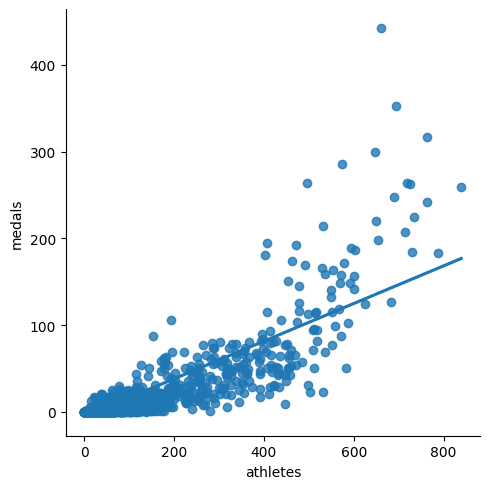

In [34]:
sns.lmplot(x='athletes',y='medals',data=teams,fit_reg=True, ci=None)

This makes sense, if you enter more athletes into the competition, you'll get higher chance of getting a medal. 

##### This shows that there is a relationship between the two columns: "athletes" and "medals". 

##### Let's look at a column where there isn't a strong correlation  : 'age' 

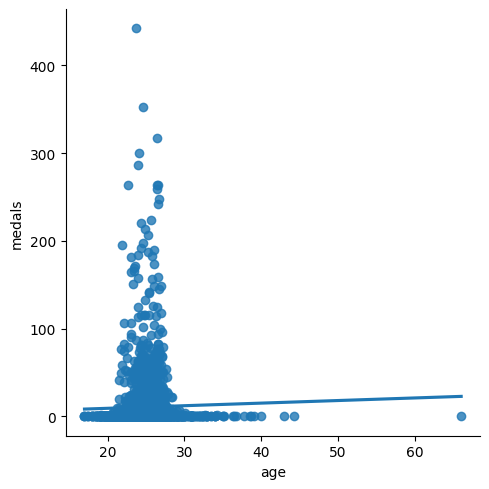

In [38]:
sns.lmplot(x='age',y='medals',data=teams,fit_reg=True, ci=None)

There isn't really a linear relationship between 'age' and 'medals'. 

We will not use 'age' as a predictor in our model.

<Axes: ylabel='Frequency'>

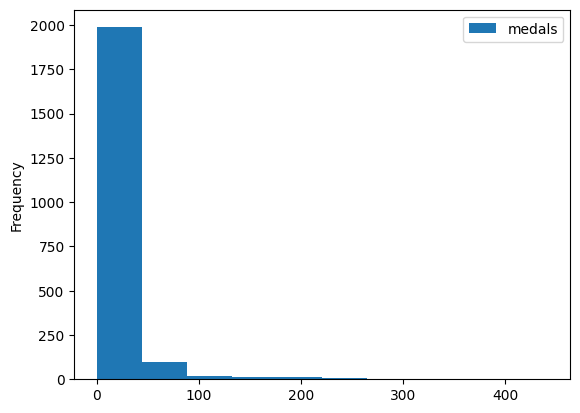

In [39]:
teams.plot.hist(y='medals')

We can see that a lot of countries have earned between 0 and 50 medals in the Olympics. Some countries have earned a lot of medals, but most of countries have earned very few medals. 

This may impact the accuracy of our model, but we'll examine in later.

### Data Cleaning 

We will have to find the rows that have missing values, and drop them. 

In [40]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


We can see that there are 130 rows taht have missing values for the previous medals columns. This can be explained by the fact that they didn't participate on the previous Olympics, as in the case of Albania...

In [41]:
teams = teams.dropna()
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


Now our data doesn't have any missing values and is ready to be used. 

### Split our data 

We will take the last 2 years of our data as our Test Data and the previous years as our Train Data

In [44]:
teams["year"].min()

np.int64(1964)

In [46]:
teams["year"].min()

np.int64(1964)

- Train Data : 1964 until 2012
- Test Data : 2012 - 2016

In [48]:
train = teams[teams['year']< 2012].copy()
test = teams[teams['year']>=2012].copy()

In [49]:
train.shape

(1609, 7)

In [50]:
test.shape

(405, 7)

The reason we do that is that we don't want to train the model on the train test and evaluate how well it is doing also on the train test. We want the model to be evaluated on the data he hasn't seen before.

Here we have a good split between the data, like a default 80-20 train-test split, which is perfect.

### Training the Model

In [53]:
reg= LinearRegression()

In [54]:
predictors = ['athletes','prev_medals'] # The columns we are going to use to predict our target
target = 'medals'

In [55]:
reg.fit(train[predictors],train[target])

LinearRegression()

##### Let's use our model to make predictions 

In [57]:
predictions= reg.predict(test[predictors])

In [60]:
predictions

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

##### We will do some modifications to better visualize the results

In [63]:
test["predictions"]= predictions #A new column "predictions" will be added

In [62]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [65]:
test.loc[test["predictions"] < 0, "predictions"] = 0 
# This will replace the negative values with a 0

In [66]:
test['predictions'] = test['predictions'].round()
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


### Let's look at the Error of our Model

In [70]:
error = mean_absolute_error(test[target],test["predictions"])
error

3.2987654320987656

On average, we are are whithin 3,3 medals of how many medals a team actuammy won in the olympics.

### Is this a good error? 

In [72]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

We generally want to make sure that the error is below the standard deviation (std). 

In our case, 3,3 < 33,6, so our model seems to be ok.

##### We can look team by team to see how our predictions look for different countries

In [76]:
test[test["team"]== "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


We are not super far off.

In [77]:
test[test['team']== 'IND']

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


In [79]:
errors = (test['medals'] - test['predictions']).abs()
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

##### Let's group this differences between the True Value and the Estimated one by our Model by team .

In [80]:
error_by_team = errors.groupby(test['team']).mean()
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

##### let's look at how many madels in average each country/team earned

In [83]:
medals_by_team = test["medals"].groupby(test["team"]).mean()

In [85]:
error_ratio = error_by_team/medals_by_team
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [87]:
error_ratio[~pd.isnull(error_ratio)] # we will take only values that are not missing 

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [90]:
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

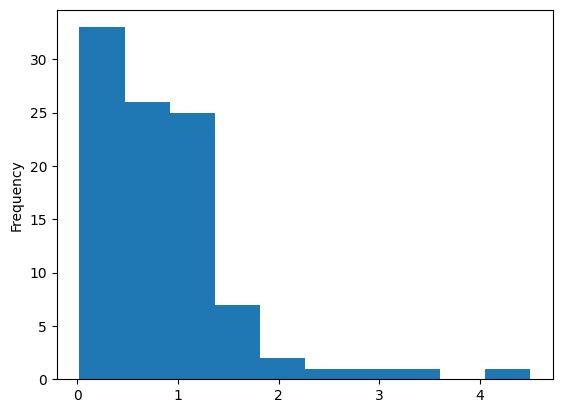

In [91]:
error_ratio.plot.hist()

In [92]:
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64

For countries that consistently win a lot of medals, the model performs well, with a low error ratio (e.g., France, Canada, New Zealand...).

#### There are a few ways we could improve the model : 

* Add in more predictors
* Try different models